In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/iris.data', header=None)
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']

In this notebook, we'll continue exploring the Iris dataset by creating some **visualizations**, or different plots of the data. Visualizing a dataset is an important step in the data science process; we want to make sure we really understand the structure and details of the data to inform our feature engineering and model selection (steps we will discuss soon!). To create our visualizations, we'll use a python package called `matplotlib`.

# Histograms

One of the simplest plots for visualizing numeric data is called a **histogram**. A histogram helps us understand the *distribution* of a variable, i.e., how our observations of that variable are distributed over different values. To create a histogram, we can use [plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)—let's create a histogram of sepal width. 

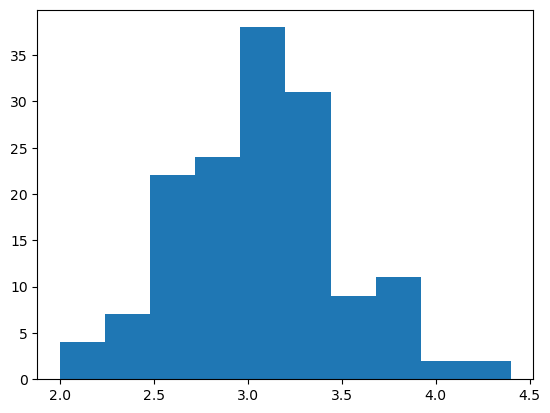

In [3]:
plt.hist(df['sepal_width']) # pass a column of the dataframe to hist()

plt.show() # plt.show() tells matplotlib to display the figure we've set up

This plot is looking a little bare. Matplotlib offers a lot of flexibility in customizing our plots. First, let's add labels to the x and y axis with [xlabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) and [ylabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html).

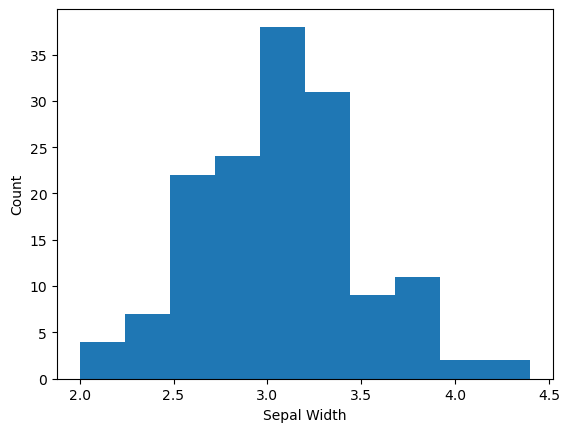

In [4]:
plt.hist(df['sepal_width'])
plt.xlabel('Sepal Width') # x axis corresponds to different sepal widths
plt.ylabel('Count') # y axis shows the number of observations with sepal widths in that range

plt.show()

Let's customize this a bit more. We can change the color of the bars by adding a `color` argument to `hist()` (hint: you can pass a string with the name of a simple color, e.g., 'red', 'green', 'orange'). In addition to setting the x and y labels, let's also give the figure a title. You can use [title()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) in the same way as `xlabel()` and `ylabel()`.

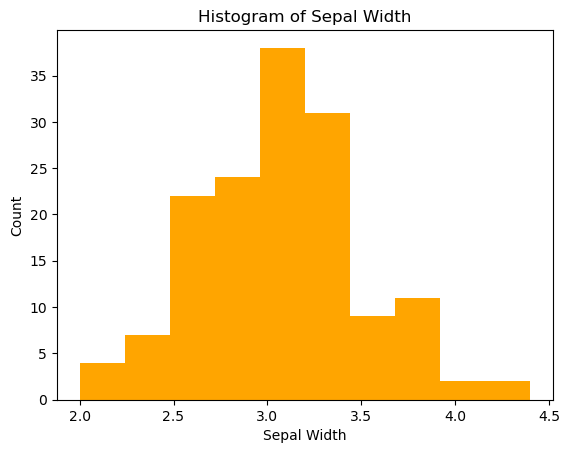

In [5]:
plt.hist(df['sepal_width'], color='orange') #TODO: set color='color of your choice'
plt.xlabel('Sepal Width')
plt.ylabel('Count')
plt.title('Histogram of Sepal Width') # TODO: title the plot "Histogram of Sepal Width"

plt.show()

Let's say we want to create a figure with multiple subplots. For this, we can use the `plt.subplots()` function. We pass the number of rows and columns in our figure to `subplots`, and we'll also set the size of the figure (a tuple `(width, length)`). `subplots` will return two objects, `fig` and `axes`. `fig` is a matplotlib object that represents the whole figure, while `axes` is a list of objects corresponding to each individual subplot. We can then use similar functions (`hist`, `set_xlabel`) applied to an element of `axes` to create a visualization in one of the subplots. Here, we create a figure with three subplots (so `axes` will have length 3) and re-create the histogram from above in the first subplot.

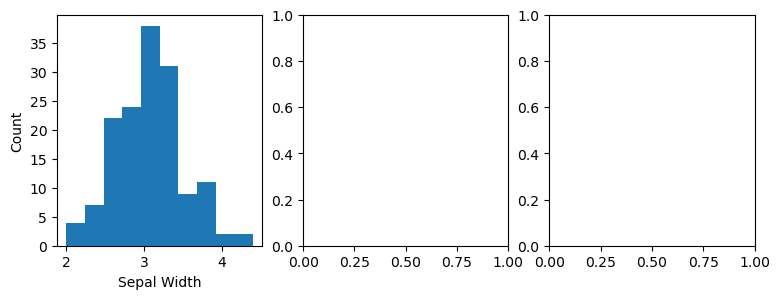

In [6]:
fig, axes = plt.subplots(1,3, figsize=(9,3)) # 1 row, 3 columns

axes[0].hist(df['sepal_width']) # apply hist to the first element of axes
axes[0].set_xlabel('Sepal Width')
axes[0].set_ylabel('Count')
# note that some function names are slightly different when applied to an axis (.xlabel() -> .set_xlabel())

plt.show()

Great! Let's use this three-plot figure to compare the sepal widths of setosa, versicolor, and virginica flowers. One way to do this is to take subsets of the dataframe for each class.

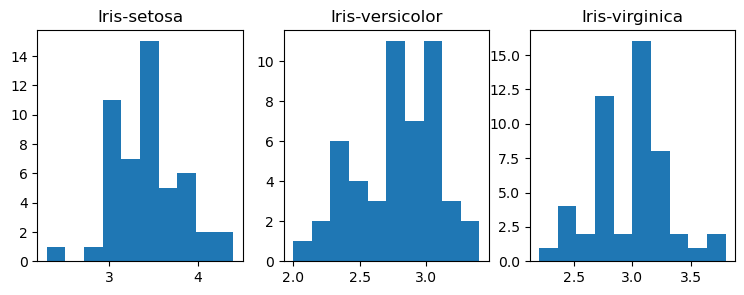

In [7]:
fig, axes = plt.subplots(1,3, figsize=(9,3))

df_setosa = df[df['class']=='Iris-setosa'] # create a dataframe with only setosa flowers
axes[0].hist(df_setosa['sepal_width']) # plot setosa flowers in axes[0]
axes[0].set_title('Iris-setosa')

df_versicolor = df[df['class']=='Iris-versicolor']
axes[1].hist(df_versicolor['sepal_width']) # plot versicolor flowers in axes[0]
axes[1].set_title('Iris-versicolor')

df_virginica = df[df['class']=='Iris-virginica']
axes[2].hist(df_virginica['sepal_width']) # plot virginica flowers in axes[0]
axes[2].set_title('Iris-virginica')

plt.show()

Wow! That's a lot of repetitive code. We can clean this up a bit using a *for loop* over the three classes.

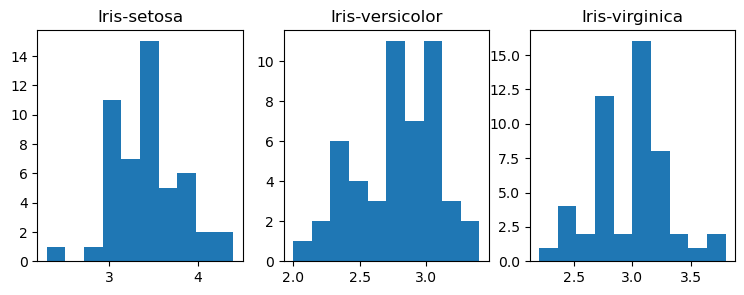

In [8]:
fig, axes = plt.subplots(1,3, figsize=(9,3))

current_axis = 0
for iris_class in ['Iris-setosa', 'Iris-versicolor','Iris-virginica']:
    
    class_df = df[df['class']==iris_class] 
    axes[current_axis].hist(class_df['sepal_width'])
    axes[current_axis].set_title(iris_class)
    
    # increment current_axis so the next iteration of the loop will use the next subplot
    current_axis += 1  

plt.show()

Looking at the x axis of these plots, the three histograms aren't all on the same scale, making them hard to compare. We can set the `sharex` argument of `subplots()` to `True` to force the subplots to use the same scale for the x axis.

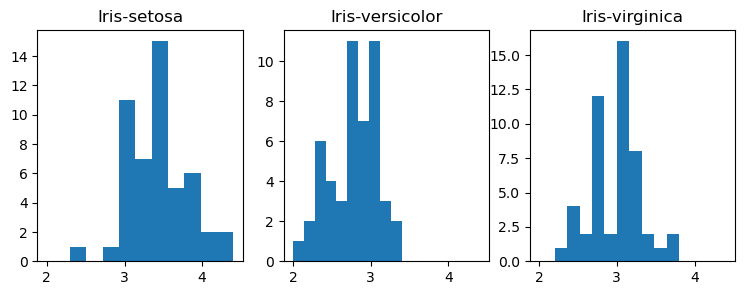

In [9]:
fig, axes = plt.subplots(1,3, figsize=(9,3), sharex=True) #TODO: set sharex to True

current_axis = 0
for iris_class in ['Iris-setosa', 'Iris-versicolor','Iris-virginica']:
    
    class_df = df[df['class']==iris_class] 
    axes[current_axis].hist(class_df['sepal_width'])
    axes[current_axis].set_title(iris_class)
    
    current_axis += 1  

plt.show()

Now we can see that the sepal widths for versicolor flowers are generally lower, while the setosa flowers are the only ones with observed sepal widths over 4 centimeters.

To wrap up this section, we will write a function that takes a dataframe and a variable name as input and produces these histograms. (You should be able to mostly re-use code from the previous plot!)

In [10]:
def histograms_by_class(df, var):
    # TODO: create a matplotlib figure with a histogram of df[var] for each class of iris
    fig, axes = plt.subplots(1,3, figsize=(9,3), sharex=True) #TODO: set sharex to True

    current_axis = 0
    for iris_class in ['Iris-setosa', 'Iris-versicolor','Iris-virginica']:

        class_df = df[df['class']==iris_class] 
        axes[current_axis].hist(class_df[var])
        axes[current_axis].set_title(iris_class)

        # increment current_axis so the next iteration of the loop will use the next subplot
        current_axis += 1  

    plt.show()

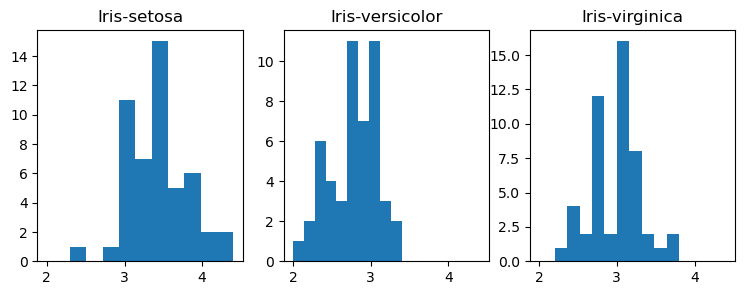

In [11]:
histograms_by_class(df, 'sepal_width') # should match the plot above

Use this function to look at the histograms for the other three variables (`sepal_length`,`petal_length`, and `petal_width`.) Which variables do you think will be most helpful for predicting the flower species?

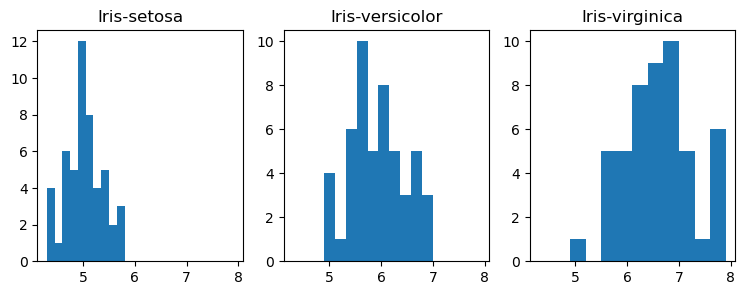

In [12]:
histograms_by_class(df, 'sepal_length')

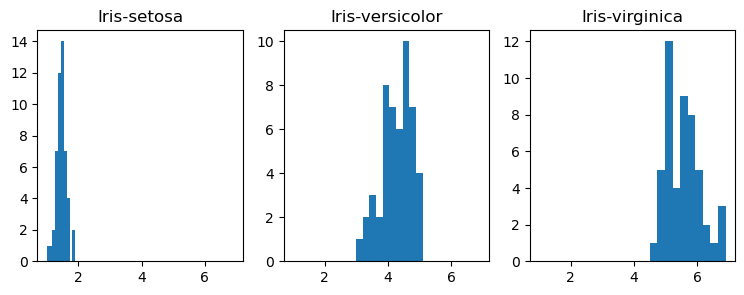

In [13]:
histograms_by_class(df, 'petal_length')

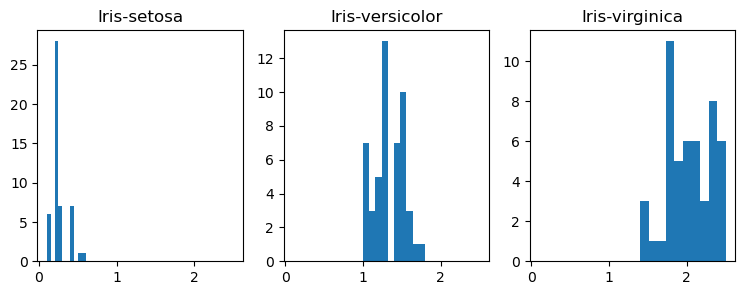

In [14]:
histograms_by_class(df, 'petal_width')

# Scatter plots

Another helpful type of plot is a **scatter plot**. This type of plot takes two numeric variables, plotting one on the x-axis and one on the y-axis. If we create a scatter plot with sepal length on the x-axis and sepal width on the y-axis, a flower with a sepal length of 5 and and a sepal width of 2 would be represented by a point at (5,2). 

We can use `ax.scatter(x,y)` to create a scatter plot with matplotlib. (Note: although we aren't using multiple subplots right now, it's generally preferred to use `plt.subplots()` and operate on axes directly, instead of using, e.g., `plt.scatter()`. One benefit is this makes it easy to switch your plot to have multiple subplots later.)

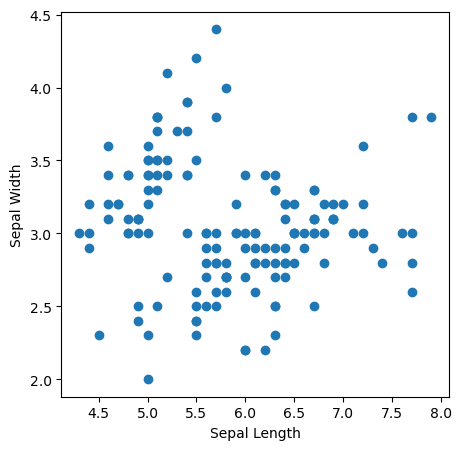

In [15]:
fig, ax = plt.subplots(figsize=(5, 5)) 
# note: when there is only one subplot, ax is a single object, not a list

ax.scatter(df['sepal_length'], df['sepal_width'])
# TODO: add x and y axis labels to the scatterplot
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

plt.show()

This scatterplot would be more helpful for understanding the relationship between flower measurements and flower species if we could represent the species of each dot. Let's give each dot a color based on its species. First, let's define a Python **dictionary** specifying a relationship between species and colors.

In [16]:
class_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

Quick detour on dictionaries: a dictionary is a set of `key: value` pairs, where `dict[key]` returns the value we've saved. For example, we can find the color assigned to virginica flowers with:

In [17]:
class_colors['Iris-virginica']

'blue'

We can view all the keys we've saved in our dictionary with:

In [18]:
class_colors.keys()

dict_keys(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

Great! Let's use this dictionary to tell matplotlib which color to make each dot, based on its class. We'll use a loop over the classes, and the `color` argument, as you've seen before. 

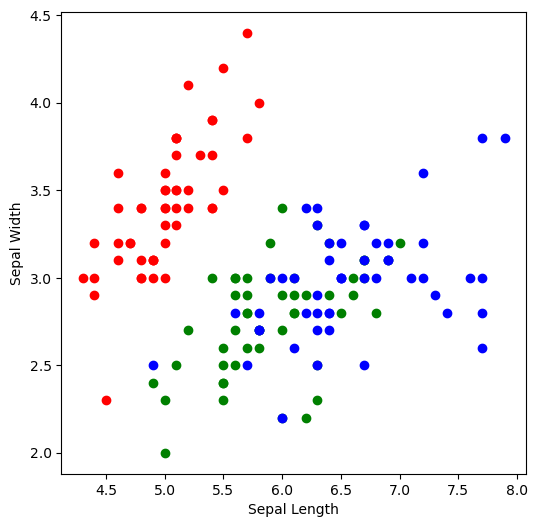

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))

for iris_class in class_colors.keys(): # iterate over classes
    class_data = df[df['class'] == iris_class]
    ax.scatter(class_data['sepal_length'], class_data['sepal_width'], color=class_colors[iris_class])

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

plt.show()

This looks cool, but it would be more helpful if we could easily tell which color corresponded to which class. Matplotlib makes generating a **legend**, or key, for your plot easy. We will just pass each individual `scatter` plot a label using the `label` argument, and then call `ax.legend()` at the end.

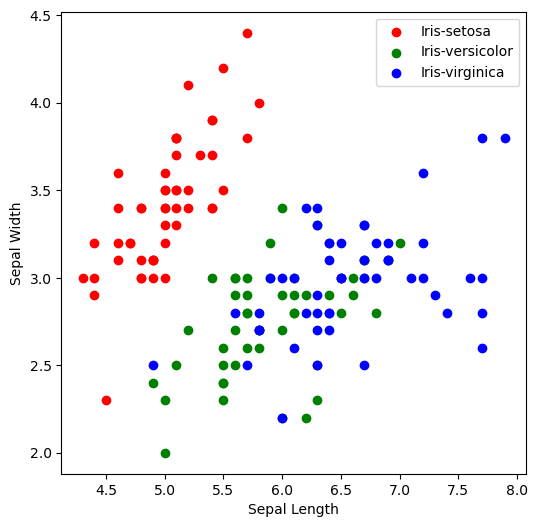

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))

for iris_class in class_colors.keys():
    class_data = df[df['class'] == iris_class]
    ax.scatter(class_data['sepal_length'], class_data['sepal_width'],
               color=class_colors[iris_class], label=iris_class) # set the label to the class name

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

ax.legend() # add a legend to our plot with the labels we specified

plt.show()

Great! We can tell from this plot that the setosa flowers seem substantially different from the versicolor and virginica flowers, in terms of sepal length and sepal width.

For the final visualization exercise, let's explore the scatterplots of different combinations of variables. Using techniques you've already seen, create a figure with three subplots. In each subplot, re-create the scatterplot from above with a different combination of the four measurement variables (i.e., a pair of variables other than sepal length and width). Choose any variable combinations that seem interesting to you.

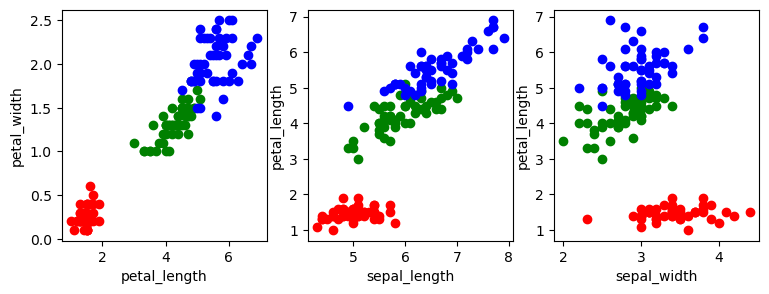

In [21]:
# TODO: create a figure with three interesting scatterplots
fig, axes = plt.subplots(1,3, figsize=(9,3))

current_axis=0
for var_pair in [('petal_length','petal_width'),('sepal_length','petal_length'),('sepal_width','petal_length')]:
    
    for iris_class in class_colors.keys():
        class_data = df[df['class'] == iris_class]
        axes[current_axis].scatter(class_data[var_pair[0]], class_data[var_pair[1]],
                   color=class_colors[iris_class], label=iris_class) 
        axes[current_axis].set_xlabel(var_pair[0])
        axes[current_axis].set_ylabel(var_pair[1])
    current_axis += 1  

plt.show()